# Banking Loss Events

###### Understand hidden patterns and trends by combining various fields in Explore. Predict the leading drivers of a target, for example, using ‘Recovery Amount’ as the target.

In [19]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

# 1 Get the Data

In [20]:
df = pd.read_csv('08 WA_Fn-UseC_-Banking-Loss-Events-2007-14.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Columns: 256 entries, Region to Unnamed: 255
dtypes: float64(243), int64(2), object(11)
memory usage: 2.7+ MB


In [21]:
df['Net_Loss']=df['Net Loss'].apply(lambda x: float(x.replace(',', '')))
df['Gross_Loss']=df['Estimated Gross Loss'].apply(lambda x: float(x.replace(',', '')))
df = df[['Region','Business','Risk Category','Year','Net_Loss','Gross_Loss']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 6 columns):
Region           1402 non-null object
Business         1402 non-null object
Risk Category    1402 non-null object
Year             1402 non-null int64
Net_Loss         1402 non-null float64
Gross_Loss       1402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 65.8+ KB


# 2 Years

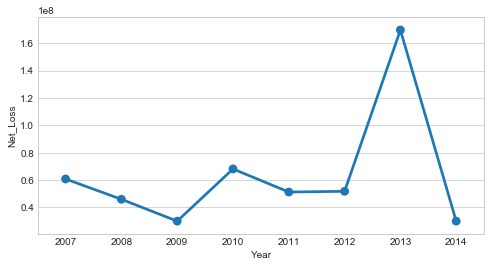

In [22]:
temp = pd.DataFrame(df.groupby(['Year'], axis=0, as_index=False)['Net_Loss'].sum())
plt.figure(figsize=(8,4))
sns.pointplot(x="Year", y="Net_Loss",data=temp)

# 3a Distribution by Region

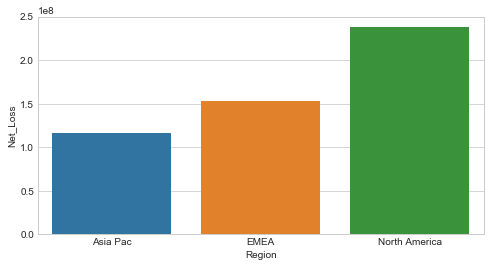

In [23]:
temp = pd.DataFrame(df.groupby(['Region'], axis=0, as_index=False)['Net_Loss'].sum())
plt.figure(figsize=(8,4))
sns.barplot(x="Region", y="Net_Loss",data=temp)

# 3b Distribution by Business

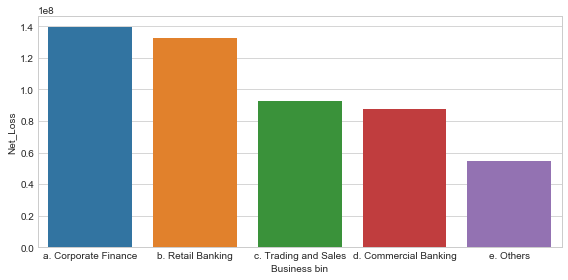

In [24]:
def func_region(x):
    if x=="Corporate Finance": return "a. Corporate Finance"
    if x=="Retail Banking": return "b. Retail Banking"
    elif x=="Trading and Sales": return "c. Trading and Sales"
    elif x=="Commercial Banking": return "d. Commercial Banking"
    else: return "e. Others"
df['Business bin'] = df['Business'].apply(func_region)

temp = pd.DataFrame(df.groupby(['Business bin'], axis=0, as_index=False)['Net_Loss'].sum())
plt.figure(figsize=(8,4))
sns.barplot(x="Business bin", y="Net_Loss",data=temp)
plt.tight_layout()

# 3c Distribution by Risk Category

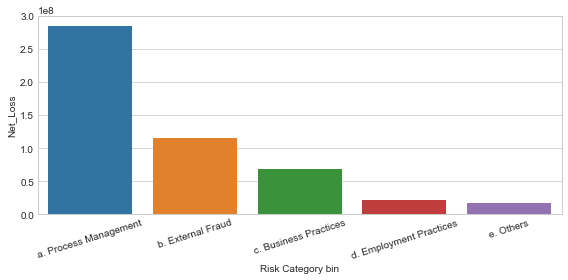

In [25]:
def func_riskcat (x):
    if x=="Execution, Delivery and Process Management": return "a. Process Management"
    elif x=="External Fraud": return "b. External Fraud"
    elif x=="Clients, Products and Business Practices": return "c. Business Practices"
    elif x=="Employment Practices and Workplace Safety": return "d. Employment Practices"
    else: return "e. Others"
df['Risk Category bin'] = df['Risk Category'].apply(func_riskcat)

temp = pd.DataFrame(df.groupby(['Risk Category bin'], axis=0, as_index=False)['Net_Loss'].sum())
plt.figure(figsize=(8,4))
sns.barplot(x="Risk Category bin", y="Net_Loss",data=temp)
plt.xticks(rotation=17.5)
plt.tight_layout()

# 4a Distribution by Region (Years)

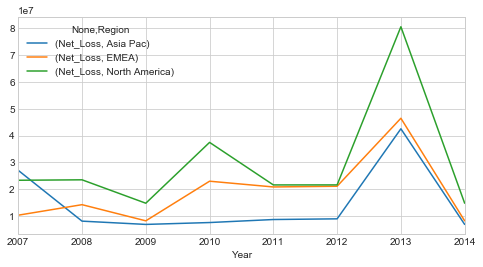

In [26]:
temp = df.pivot_table(values=['Net_Loss'], index=['Year'], columns=['Region'], aggfunc='sum')
temp.plot(figsize=(8,4))

# 4b Distribution by Business  (Years)

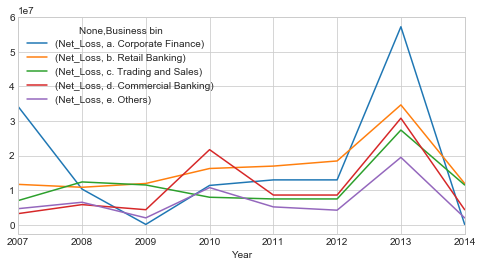

In [27]:
temp = df.pivot_table(values=['Net_Loss'], index=['Year'], columns=['Business bin'], aggfunc='sum')
temp.plot(figsize=(8,4))

# 4c Distribution by Risk Category (Years)

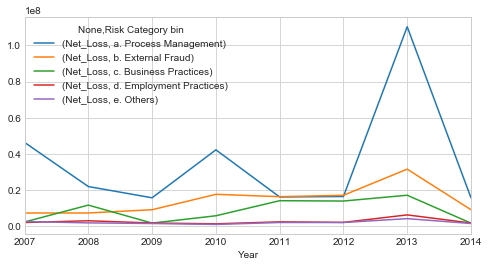

In [28]:
temp = df.pivot_table(values=['Net_Loss'], index=['Year'], columns=['Risk Category bin'], aggfunc='sum')
temp.plot(figsize=(8,4))

# 5 Areas of concern (top 5)

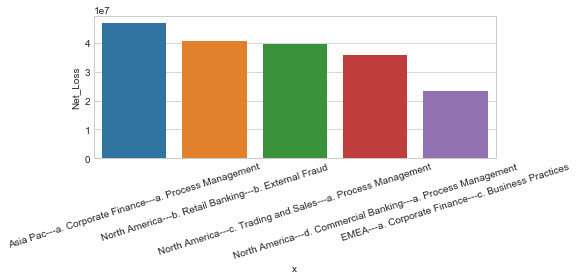

In [29]:
df['x'] = df['Region'] + '---' + df['Business bin'] + '---' + df['Risk Category bin']
temp = pd.DataFrame(df.groupby(['x'], axis=0, as_index=False)['Net_Loss'].sum())
temp.sort_values('Net_Loss',axis=0, ascending=False, inplace=True)

plt.figure(figsize=(8,4))
sns.barplot(x="x", y="Net_Loss",data=temp.head())
plt.xticks(rotation=17.5)
plt.tight_layout()